# Sweep laser pointer across the Moon from Earth

Plan: 
Use SymPy to:
1. Derive formula for distance Earth - Moon surface as a function of the sweep angle from Earth perspective
2. Derive formula for the arrival time as a function of the sweep angle, under consideration of the sweep angular speed

Plot the following:
- Arrival time vs sweep angle
- Moon surface location vs sweep angle
...


In [515]:
import sympy
from sympy import *

# Parameters for the calculations

c = symbols('c', positive=True ) # Speed of light in vacuum
R = symbols('R', positive=True ) # Radius of the Moon (target sphere)
D = symbols('D', positive=True ) # Distance Earth to Moon center
alpha = symbols('alpha')         # Angle of laser pointer direction
omega = symbols('omega')         # Angular velocity of laser pointer movement
T = symbols('T')                 # Sweep duration
L = symbols('L', positive=True ) # Flight path length (distance Earth - Moon surface point)
a, b = symbols('a b')            # coordinates of Moon surface point
t = symbols('t')                 # time in seconds


In [516]:

geometry = solve([a*a + b*b - R*R, a - L*sin(alpha), D - b - L*cos(alpha)], L, a, b)
print( geometry[0] )
print( geometry[1] )
# select the relevant solution (must be less than D) 
pathLength = Lambda(alpha, geometry[0][0])  # define as function of alpha
surfacePointVertical = geometry[0][1]
surfacePointHorizontal = geometry[0][2]
#print(pathLength, surfacePointVertical, surfacePointHorizontal)


(D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2), (D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha), D*sin(alpha)**2 + sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha))
(D*cos(alpha) + sqrt(-D**2*sin(alpha)**2 + R**2), (D*cos(alpha) + sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha), D*sin(alpha)**2 - sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha))


In [517]:
pathLength

Lambda(alpha, D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))

In [518]:
surfacePointHorizontal

D*sin(alpha)**2 + sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha)

In [519]:
surfacePointVertical

(D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)

In [520]:
# Angle of the surface point
beta = asin(surfacePointVertical/R)
beta

asin((D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)/R)

In [521]:
# Minimum and maximum ray distances
L_min = D - R
L_max = sqrt(D*D - R*R)

In [522]:
# Maximum/Minimum angle of Moon (full moon appears with angular diameter 2 * alpha_max)
alpha_max = asin(R/D)
alphaStart = alpha_max
alphaEnd = -alpha_max

In [523]:
# Define a function for the surface angle beta with argument alpha
surfaceAngle = Lambda(alpha, beta)
surfaceAngle

Lambda(alpha, asin((D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)/R))

In [524]:
# Sweep dynamics
# Assumption: t = 0 is start of sweep
sweepAngle = Lambda(t, alphaStart + omega*t)   # Sweep angle as a function of time (sweep from alpha_max to -alpha_max)
sweepAngle

Lambda(t, omega*t + asin(R/D))

In [525]:
# Ray arrival time as function of time
arrivalTime = Lambda(t, t + pathLength(sweepAngle(t))/c)

In [526]:
# Values for Earth - Moon system
speedOfLight = 300000.0      # speed of light in vacuum (km/s)
distanceEarthMoon = 382500.0 # distance Earth - Moon (average) (km)
moonRadius = 1737.5          # Moon radius (km)

# Dictionary for substitution into analytic formulas:
earthMoonSystem = {D: distanceEarthMoon, R: moonRadius, c: speedOfLight}


In [527]:
# Replace variables with values for Earth - Moon system
surfaceAngleMoon = surfaceAngle.evalf(subs=earthMoonSystem)
surfaceAngleMoon

Lambda(alpha, asin(0.000575539568345324*(-382500.0*sqrt(2.06341578025546e-5 - sin(alpha)**2) + 382500.0*cos(alpha))*sin(alpha)))

0.00454249928199655 -0.00454249928199655


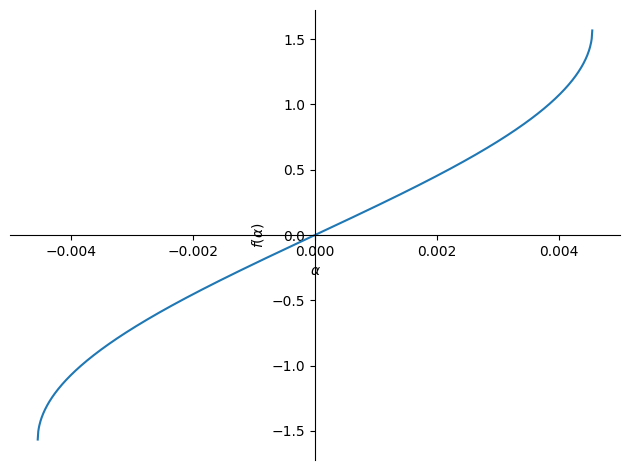

In [528]:
# 
alphaStartMoon = alphaStart.evalf(subs=earthMoonSystem)
alphaEndMoon = alphaEnd.evalf(subs=earthMoonSystem)
print(alphaStartMoon, alphaEndMoon)
plot(surfaceAngleMoon(alpha), (alpha, alphaStartMoon, alphaEndMoon))

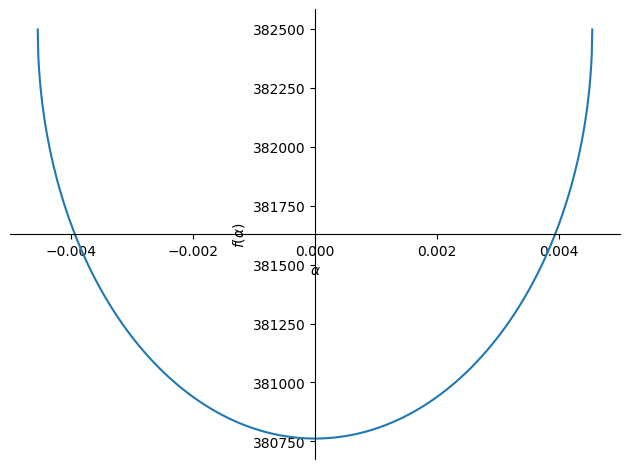

In [529]:
#
pathLengthMoon = pathLength.evalf(subs=earthMoonSystem)
pathLengthMoon

plot(pathLengthMoon(alpha), (alpha, alphaStartMoon, alphaEndMoon))

In [530]:
# Sweep dynamics
angularSpeed = (alphaEnd - alphaStart) / T               # Angular Sweep speed in rad/sec
angularSpeed

-2*asin(R/D)/T

In [531]:
arrivalTime = Lambda(t, t + pathLength(sweepAngle(t))/c) # Arrival time at moon service as function of time
arrivalTime

Lambda(t, t + (D*cos(omega*t + asin(R/D)) - sqrt(-D**2*sin(omega*t + asin(R/D))**2 + R**2))/c)

In [532]:
arrivalTime(0)

D*sqrt(1 - R**2/D**2)/c

In [533]:
# solve(arrivalTime(t) - arrivalTime(0),t)
# no analytical solution

Lambda(t, t - 1.275*(2.06341578025546e-5 - sin(0.90849985639931*t - 0.00454249928199655)**2)**0.5 + 1.275*cos(0.90849985639931*t - 0.00454249928199655))
Max arrival time with image doubling: 0.00571864866213344


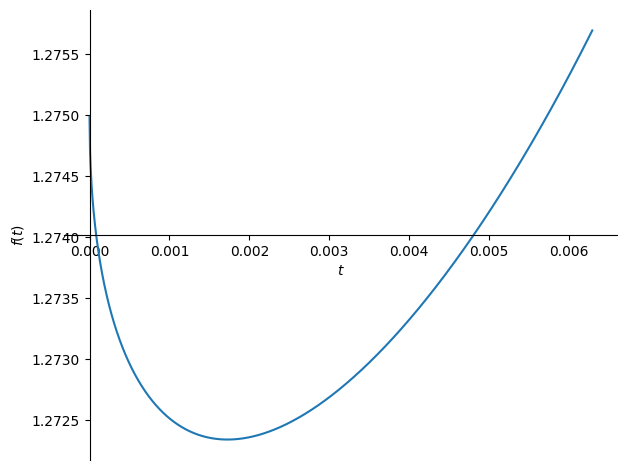

In [534]:
# Arrival time for Earth - Moon system:
sweepDuration = 0.01          # Sweep duration in seconds

# Dictionary for replacing values into formulas
sweepDynamic = {T: sweepDuration, omega: angularSpeed}

# Get Moon arrival time as function of time (= departure time from Earth)
arrivalTimeMoon = arrivalTime.evalf(subs=sweepDynamic).evalf(subs=earthMoonSystem).evalf(subs=sweepDynamic)
print(arrivalTimeMoon)

# The maximum arrival time is for the end of the sweep: 
maxArrivalTimeMoon = sweepDuration + arrivalTimeMoon(0)

# Calculate the time when arrival time is same as arrival time at farthest distance
# This is the maximum arrival time where 2 points have the same arrival time
# Open issue: this numerical solution is returned as a complex number with a very small imaginary part.
# - Have not yet found a way around that other than taking the real part only.
# - Maybe use a SciPy solver (see https://docs.sympy.org/latest/guides/solving/solve-numerically.html)
maxDupTime = re(nsolve(arrivalTimeMoon(t) - arrivalTimeMoon(0), 1)) #without re() it may return a tiny imaginary part
print( 'Max arrival time with image doubling:', maxDupTime )


plot(arrivalTimeMoon(t), (t, 0, maxDupTime*1.1))
#plot(arrivalTimeMoon(t), (t, 0, sweepDuration/7000))

Shortest arrival time: 0.00172617864030599


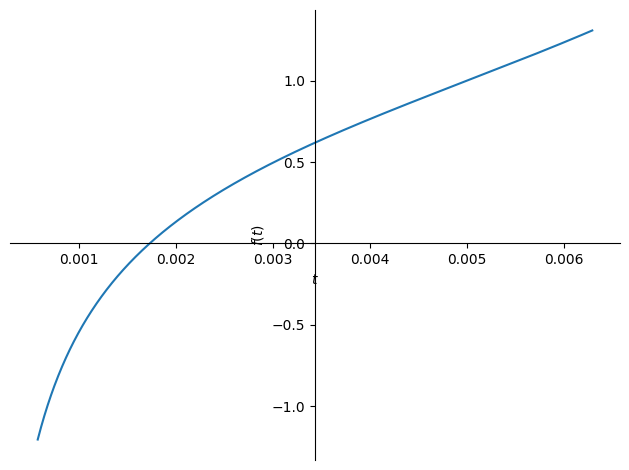

In [535]:
# Calculate shortest arrival time (numerically, no analytic solution)
# Need to set starting range > 0 because derivative is (-) infinite at t = 0
# Issue: some sweep times result in numerical overflows for certain calculations

shortestArrivalTime = nsolve(diff(arrivalTimeMoon(t)), (maxDupTime*0.001, maxDupTime*1.001))
print('Shortest arrival time:', shortestArrivalTime)

plot(diff(arrivalTimeMoon(t), t), (t, maxDupTime*0.1, maxDupTime*1.1))

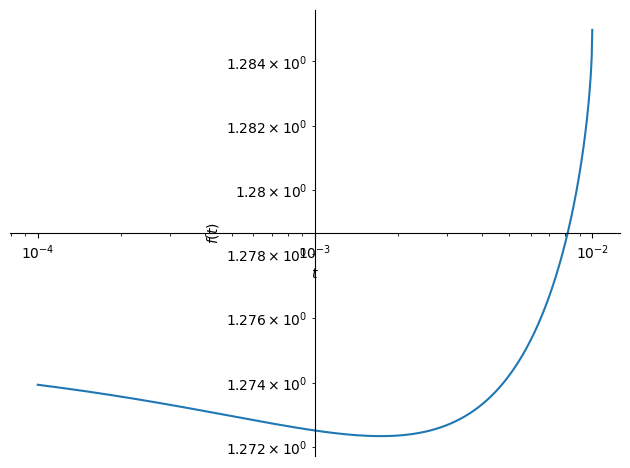

In [536]:

plot(arrivalTimeMoon(t), (t, 0.0001, sweepDuration), xscale='log', yscale='log')


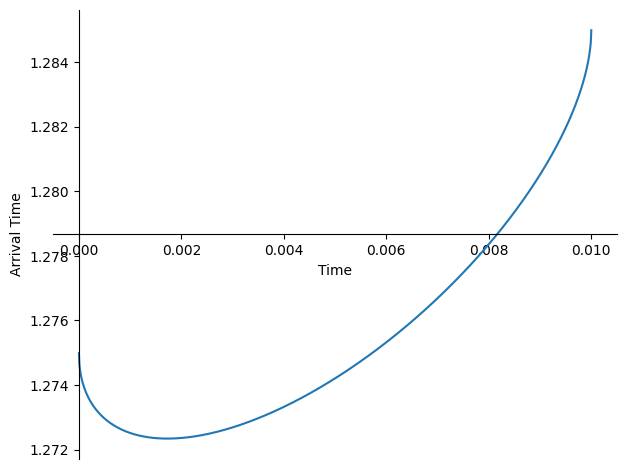

In [537]:
# Full plot of arrival time vs "start time"
plot(arrivalTimeMoon(t), (t, 0, sweepDuration), xlabel='Time', ylabel='Arrival Time')


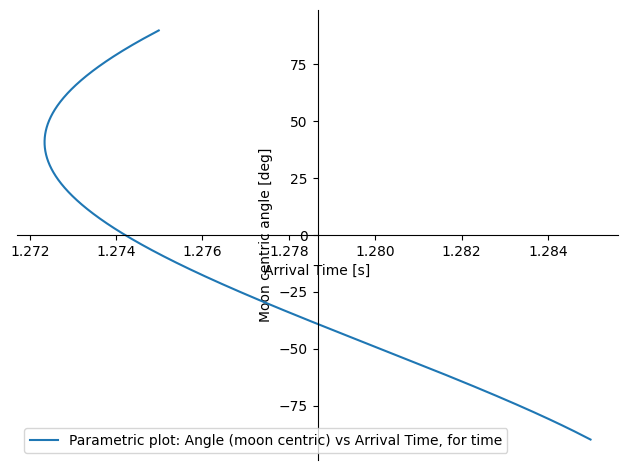

In [538]:
# Parametric plot point angle moon centric, arrival time, with parameter = time
sweepAngleMoon = sweepAngle.evalf(subs=sweepDynamic).evalf(subs=earthMoonSystem).evalf(subs=sweepDynamic)
plot_parametric(arrivalTimeMoon(t), (180.0/pi)*surfaceAngleMoon(sweepAngleMoon(t)), (t, 0, sweepDuration), 
                legend=True,
                label='Parametric plot: Angle (moon centric) vs Arrival Time, for time',
                xlabel='Arrival Time [s]', ylabel='Moon centric angle [deg]' )
